# Visualize Data 4

In this project I will try to predict protein binding residues using ProtT5 embeddings and distance maps computed from AF2 structures.
To better understand the data input and decide on an appropriate Machine Learning (ML) model, I am creating this notebook to visualize the data.
I am particularly interested in seeing if there are some obvious patterns first on the protein level and second on the residue level of the data.
Finally, I want to analyze some characteristics of binding sites such us binding site length and the 3D structure of binding sites.

In [10]:
import sys
sys.path.insert(0,'/home/george/Projects/Python/bind-af2-embed/src')

# Import dependencies
%load_ext autoreload
%autoreload 2

from config import AppConfig
from data.dataset import Dataset, BindAnnotation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read data

In [62]:
dataset = Dataset(config=AppConfig(), mode='train')

Distogram length is different for id: Q00277. Seq length: 169, Distogram length: 168. Skipping...
Distogram length is different for id: P84801. Seq length: 121, Distogram length: 120. Skipping...
Distogram length is different for id: Q9NZV6. Seq length: 116, Distogram length: 115. Skipping...
Distogram length is different for id: C8BD48. Seq length: 99, Distogram length: 98. Skipping...


## Inspect residue level stats

I am extracting embedings and distograms for each residue. 
I am interested to find patterns in AA composition that could be used as predictors for binding residues and/or binding sites.

In [63]:
long_df, tensor_dict = dataset.long_data()
long_embeddings = tensor_dict['embeddings']
long_labels = tensor_dict['binding_annotations']
long_distograms = tensor_dict['distograms']

## Questions

### Would the filtering based on pLDDT affect the patterns?


### What does the binding site structure look like in the data? How long are the binding sites? How far appart in sequence are their binding residues?

### This raises the question about the 3D structure of the binding sites. Do the binding residues reside close to each other in sequence? Or do the distograms acctually help bring distant binding residues (in sequence) together to form a single binding site?

### How many proteins and residues with a plddt >= 70?

In [5]:
cutoff = 70
total_residues = len(long_df)
quality_residues = len(long_df[long_df.plddt >= cutoff])

print(f'Total residues {str(total_residues)}')
print(f'High quality residues: {str(quality_residues)}')
print(f'Difference: {str(total_residues - quality_residues)}')

mean_prot_plddts = long_df.groupby('protein_id')['plddt'].mean()
total_proteins = len(mean_prot_plddts)
quality_proteins = len(mean_prot_plddts[mean_prot_plddts >= cutoff])
      
print(f'Total proteins {str(total_proteins)}')
print(f'High quality proteins: {str(quality_proteins)}')
print(f'Difference: {str(total_proteins - quality_proteins)}')

Total residues 232870
High quality residues: 202799
Difference: 30071
Total proteins 1310
High quality proteins: 1168
Difference: 142


### What is the pLDDT distribution of the data?

(array([  1043.,   3655.,   5879.,   5537.,   5967.,   5894.,   5113.,
          7444.,  22042., 170296.]),
 array([18.56, 26.6 , 34.64, 42.68, 50.72, 58.76, 66.8 , 74.84, 82.88,
        90.92, 98.96]),
 <BarContainer object of 10 artists>)

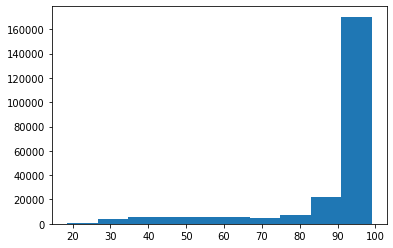

In [6]:
plt.hist(long_df.plddt)

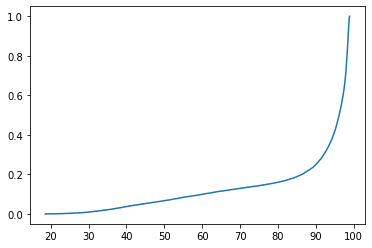

In [7]:
plt.plot(np.sort(long_df.plddt), np.linspace(0, 1, len(long_df.plddt), endpoint=False))

(array([ 10.,  20.,  22.,  23.,  26.,  38.,  47.,  73., 162., 889.]),
 array([24.20993443, 31.67372731, 39.13752019, 46.60131307, 54.06510595,
        61.52889884, 68.99269172, 76.4564846 , 83.92027748, 91.38407037,
        98.84786325]),
 <BarContainer object of 10 artists>)

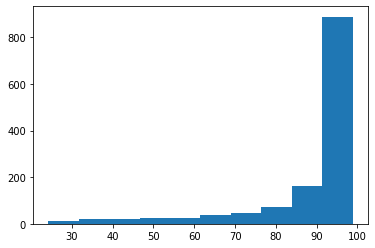

In [8]:
plt.hist(long_df.groupby('protein_id')['plddt'].mean())

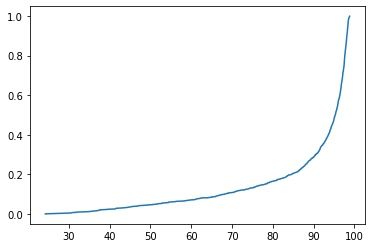

In [9]:
a = np.sort(long_df.groupby('protein_id')['plddt'].mean())
plt.plot(a, np.linspace(0, 1, len(a), endpoint=False))

In [10]:
proteins = dataset.proteins
prot = proteins['Q0KFV0']

In [24]:
prot.show_umap(color='ligand')

UMAP(init='random', n_neighbors=30, random_state=42, verbose=True)
Thu Jun 30 14:29:45 2022 Construct fuzzy simplicial set
Thu Jun 30 14:29:46 2022 Finding Nearest Neighbors
Thu Jun 30 14:29:46 2022 Finished Nearest Neighbor Search
Thu Jun 30 14:29:46 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Jun 30 14:29:47 2022 Finished embedding


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

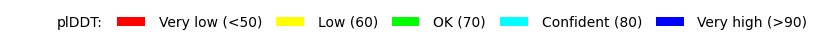

In [25]:
prot.show_structure(color='lDDT')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

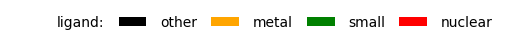

In [26]:
prot.show_structure(color='ligand')

### What is the ratio between the negative counts and the positive counts for each class?

In [64]:
df = pd.DataFrame({BindAnnotation.id2name(i): long_df.bind_annot_id.apply(lambda x: int(x[i])) for i in list(range(4))})
for lig in df.columns:
    cnts = df[lig].value_counts()
    print(f'{lig} negative values: {str(cnts[0])}')
    print(f'{lig} positive values: {str(cnts[1])}')
    print(f'{lig} negative/positive ratio: {str(cnts[0]/cnts[1]/10)}')

metal negative values: 167811
metal positive values: 2370
metal negative/positive ratio: 7.080632911392405
nuclear negative values: 167492
nuclear positive values: 2689
nuclear negative/positive ratio: 6.22878393454816
small negative values: 160945
small positive values: 9236
small negative/positive ratio: 1.742583369423993
binding negative values: 156231
binding positive values: 13950
binding negative/positive ratio: 1.1199354838709676


In [59]:
mult = 70.63026760996617 / 8.9
54.991824957922574 / 7.9
16.7195251864252 / 7.9

2.11639559321838